In [31]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\kearb\\Documents\\GitHub\\Python Projects\\AdvLabs\\Lab 1\\utils.py'>

In [83]:
#Load ALL THE DATA
spectrum_dict = utils.load_data(filepath=r'Data/Transmittance/Water-vapor.ASC', key='Water Vapor')
spectrum_dict.update(utils.load_data(r'Data/Transmittance/polystyrene.ASC', key='Polystyrene'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/glass.ASC', key ='Glass'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/NaCl blocking filter.ASC', key='NaCl'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/water vapor with plate.ASC', key='Water Vapor with Plate'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/AlO2 transmittance.ASC', key='Sapphire Transmittance'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/Si transmission try 2.ASC', key='Silicon Transmittance'))
spectrum_dict.update(utils.load_data(r'Data/Transmittance/ZnO front try 1.ASC', key='Zinc Oxide Front'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC', key='Gold Mirror Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/AlO2 Reflectivity full range.ASC', key='Sapphire Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/Silicone reflectivity spectrum.ASC', key='Silicone Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/ZnO thin film reflectivity.ASC', key='Zinc Oxide Reflectivity'))
spectrum_dict.update(utils.load_data(r'Data/Reflectivity/GaAs reflectivity spectrum.ASC', key='Gallium Arsenide Reflectivity'))
print(spectrum_dict.keys())




dict_keys(['Water Vapor', 'Polystyrene', 'Glass', 'NaCl', 'Water Vapor with Plate', 'Sapphire Transmittance', 'Silicon Transmittance', 'Zinc Oxide Front', 'Gold Mirror Reflectivity', 'Sapphire Reflectivity', 'Silicone Reflectivity', 'Zinc Oxide Reflectivity', 'Gallium Arsenide Reflectivity'])


In [84]:
# Manually input expected trough wavenumbers
# Create a blank dictionary to hold the trough data
trough_dict = {}
expected_troughs_vapor_trans = [1942.6, 1869.3, 1844.2, 1791.8, 1732, 1652.8, 1576.2, 1521.4, 1456.8, 1436.7, 1419.3, 1387.5, 502.3, 472.3, 457.8, 400.4, 302.4, 278.3, 266.2, 253.9]
actual_troughs_vapor_trans = [None] * len(expected_troughs_vapor_trans)
trough_dict['Water Vapor'] = pd.DataFrame({
    'Expected Trough': expected_troughs_vapor_trans,
    'Actual Trough': actual_troughs_vapor_trans
})

expected_troughs_polystyrene_trans = [3081.5, 3059.5, 3025.6, 2922.3, 2850.3, 1942.6, 1802.4, 1601.4, 1583.1, 1452.3, 1181.5, 1154.5, 1069.0, 1028.5, 906.9, 699.8, 541.0]
actual_troughs_polystyrene_trans = [None] * len(expected_troughs_polystyrene_trans)
trough_dict['Polystyrene'] = pd.DataFrame({
    'Expected Trough': expected_troughs_polystyrene_trans,
    'Actual Trough': actual_troughs_polystyrene_trans
})



In [87]:
trough_dict['Water Vapor'] = utils.find_troughs_simple(
    spectrum_dict=spectrum_dict,
    key='Water Vapor',
    trough_dict=trough_dict,
    window=3
)
trough_dict['Water Vapor']['Offset'] = trough_dict['Water Vapor']['Actual Trough'] - trough_dict['Water Vapor']['Expected Trough']
print(trough_dict['Water Vapor'].head(20))

trough_dict['Polystyrene'] = utils.find_troughs_simple(
    spectrum_dict=spectrum_dict,
    key='Polystyrene',
    trough_dict=trough_dict,
    window=3
)

trough_dict['Polystyrene']['Offset'] = trough_dict['Polystyrene']['Actual Trough'] - trough_dict['Polystyrene']['Expected Trough']
print(trough_dict['Polystyrene'].head(20))


# for key in trough_dict:
#     trough_dict[key] = find_troughs_simple(spectrum_dict, key, trough_dict, window=10)

    Expected Trough Actual Trough  Intensity Offset
0            1942.6        1943.0  71.977392    0.4
1            1869.3        1869.0  67.891100   -0.3
2            1844.2        1844.0  65.612091   -0.2
3            1791.8        1792.0  63.387795    0.2
4            1732.0        1734.0  52.709479    2.0
5            1652.8        1653.0  42.157645    0.2
6            1576.2        1576.0  50.455120   -0.2
7            1521.4        1521.0  46.739418   -0.4
8            1456.8        1457.0  42.014492    0.2
9            1436.7        1437.0  48.198422    0.3
10           1419.3        1419.0  47.554124   -0.3
11           1387.5        1387.0  50.669842   -0.5
12            502.3         501.0   3.871151   -1.3
13            472.3         471.0   2.589816   -1.3
14            457.8         458.0   2.216737    0.2
15            400.4         398.0   0.602389   -2.4
16            302.4         302.0   0.001645   -0.4
17            278.3         278.0   0.002755   -0.3
18          

dict_keys(['Water Vapor', 'Polystyrene', 'Glass', 'NaCl', 'Water Vapor with Plate', 'Sapphire Transmittance', 'Silicon Transmittance', 'Zinc Oxide Front', 'Gold Mirror Reflectivity', 'Sapphire Reflectivity', 'Silicone Reflectivity', 'Zinc Oxide Reflectivity', 'Gallium Arsenide Reflectivity'])


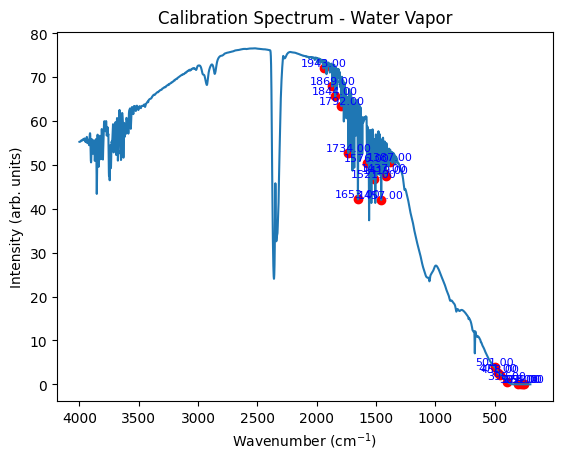

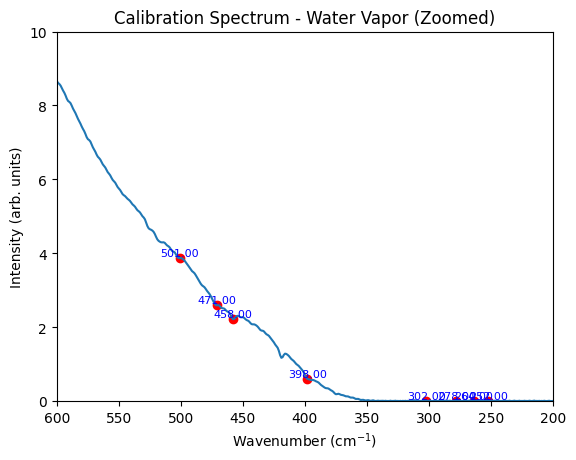

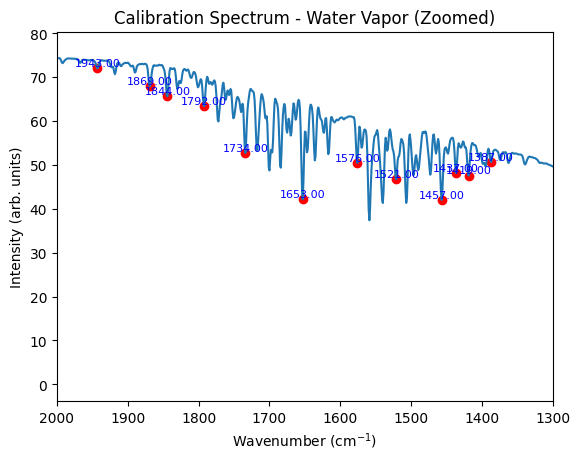

In [ ]:
#quick plot to check the data importation
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor')
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity']):
            plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.gca().invert_xaxis()
plt.show()

# Zoom in to the 0–600 wavenumber range
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor (Zoomed)')
plt.xlim(200, 600)
plt.ylim(0, 10)
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity']):
            if pd.notnull(x) and 200 <= x <= 600:  # Ensure x is within the desired range
                plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

# Zoom in to the 1300–2000 wavenumber range
plt.plot(spectrum_dict['Water Vapor']['Wavenumber'], spectrum_dict['Water Vapor']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Water Vapor (Zoomed)')
plt.scatter(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Water Vapor']['Actual Trough'], trough_dict['Water Vapor']['Intensity']):
            if pd.notnull(x) and 1300 <= x <= 2000:  # Ensure x is within the desired range
                plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='blue')
plt.xlim(1300, 2000)
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

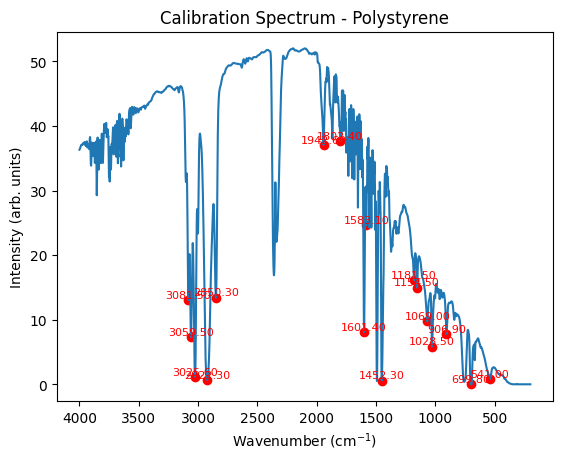

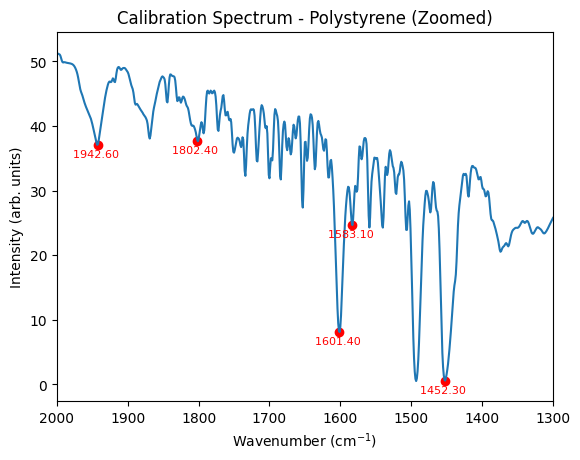

In [98]:
#quick plot to check the data importation
plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene')
plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
            plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='red')
plt.gca().invert_xaxis()
plt.show()

# Zoom in to the 0–600 wavenumber range
# plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
# plt.xlabel('Wavenumber (cm$^{-1}$)')
# plt.ylabel('Intensity (arb. units)')
# plt.title('Calibration Spectrum - Polystyrene (Zoomed)')
# plt.xlim(200, 600)
# plt.ylim(0, 10)
# plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
# for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
#             if pd.notnull(x) and 200 <= x <= 600:  # Ensure x is within the desired range
#                 plt.text(x, y, f"{x:.2f}", fontsize=8, ha='center', va='bottom', color='red')
# plt.gca().invert_xaxis()  # If you want to keep the axis inverted
# plt.show()

# Zoom in to the 1300–2000 wavenumber range
plt.plot(spectrum_dict['Polystyrene']['Wavenumber'], spectrum_dict['Polystyrene']['Intensity'])
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene (Zoomed)')
plt.scatter(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity'], color='red', label='Troughs')
for x, y in zip(trough_dict['Polystyrene']['Expected Trough'], trough_dict['Polystyrene']['Intensity']):
            if pd.notnull(x) and 1300 <= x <= 2000:  # Ensure x is within the desired range
                plt.text(x, y-4, f"{x:.2f} \n", fontsize=8, ha='center', va='bottom', color='red')
plt.xlim(1300, 2000)
plt.gca().invert_xaxis()  # If you want to keep the axis inverted
plt.show()

In [ ]:
def linear = lambda x, m, b: m * x + b
def fit_line(x, y):
    """Fit a linear line to the data."""
    m, b = np.polyfit(x, y, 1)
    return m, b

#Run the wavenumbers and deviations through the linear fit function


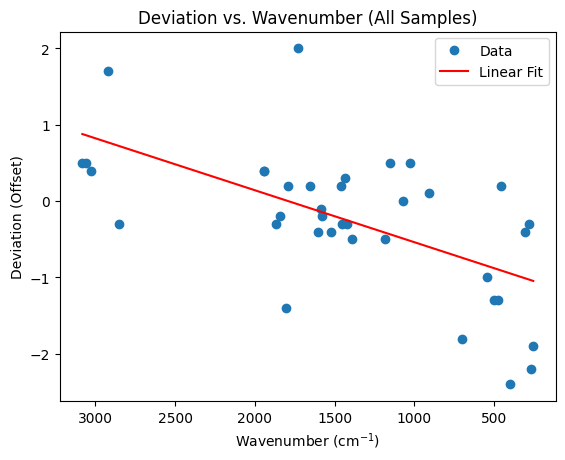

In [105]:
# Combine values from both keys
wavenumbers = trough_dict['Water Vapor']['Expected Trough'].tolist() + trough_dict['Polystyrene']['Expected Trough'].tolist()
deviations = trough_dict['Water Vapor']['Offset'].tolist() + trough_dict['Polystyrene']['Offset'].tolist()
def linear(x, m, b):
    return m * x + b

def fit_line(x, y):
    """Fit a linear line to the data."""
    m, b = np.polyfit(x, y, 1)
    return m, b

wavenumbers_np = np.array(wavenumbers)
deviations_np = np.array(deviations)

#Run the wavenumbers and deviations through the linear fit function
m, b = fit_line(wavenumbers_np, deviations_np)

# Sort for a clean line plot
sort_idx = np.argsort(wavenumbers_np)
wavenumbers_sorted = wavenumbers_np[sort_idx]
deviations_sorted = deviations_np[sort_idx]



# Plot combined data
plt.plot(wavenumbers_sorted, deviations_sorted, 'o', label='Data')
plt.plot(wavenumbers_sorted, linear(wavenumbers_sorted, m, b), color='red', label='Linear Fit')
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Deviation (Offset)')
plt.title('Deviation vs. Wavenumber (All Samples)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

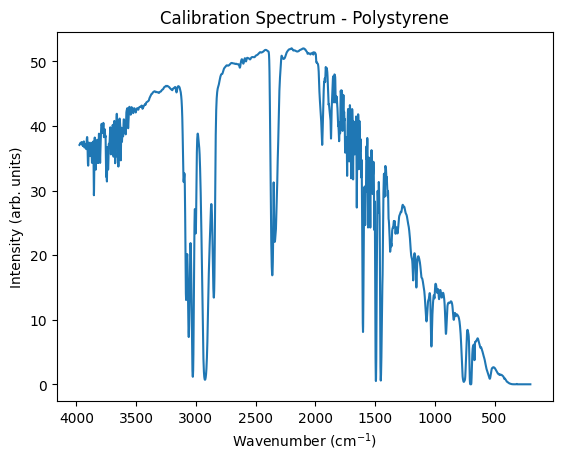

In [ ]:
#load the transmissivity data for polystyrene calibration
styrene_twavenumber, styrene_tintensity = utils.load_data(r'Data/Transmittance/polystyrene.ASC')

#quick plot to check the data importation
plt.plot(styrene_twavenumber, styrene_tintensity)
plt.xlabel('Wavenumber (cm$^{-1}$)')
plt.ylabel('Intensity (arb. units)')
plt.title('Calibration Spectrum - Polystyrene')
plt.gca().invert_xaxis()
plt.show()

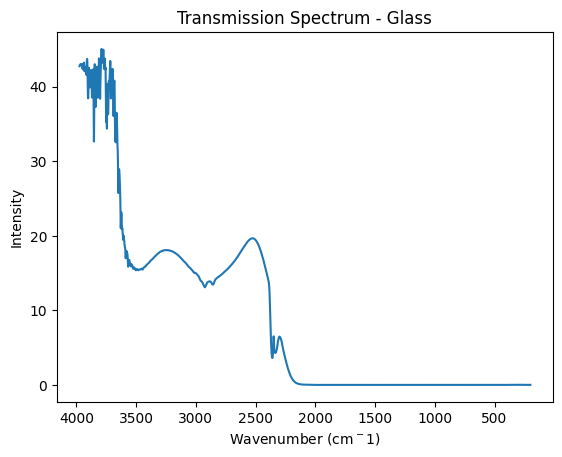

In [ ]:
#load the transmissivity data for glass
glass_twavenumber, glass_tintensity = utils.load_data(r'Data/Transmittance/glass.ASC')

#quick plot to check the data importation
plt.plot(glass_twavenumber, glass_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - Glass')
plt.gca().invert_xaxis()
plt.show()

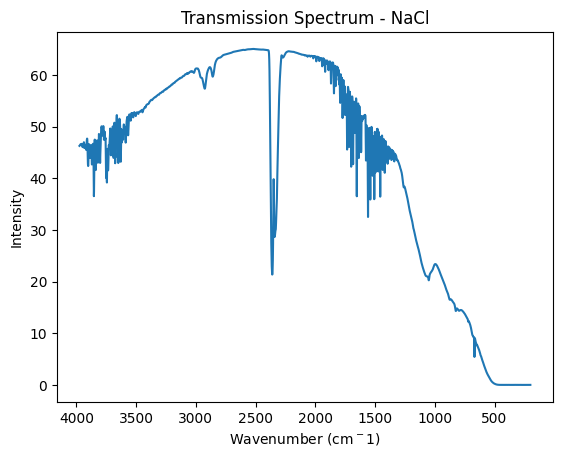

In [ ]:
#load the transmissivity data for NaCl
nacl_twavenumber, nacl_tintensity = utils.load_data(r'Data/Transmittance/NaCl blocking filter.ASC')

#quick plot to check data importation
plt.plot(nacl_twavenumber, nacl_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - NaCl')
plt.gca().invert_xaxis()
plt.show()

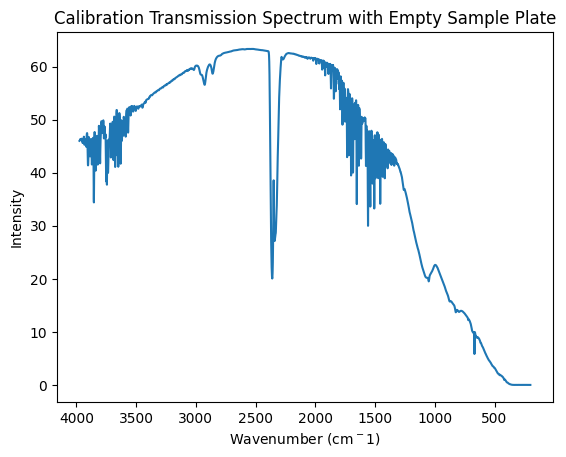

In [ ]:
#load the transmissivity for water vapor with the empty sample plate in place
vapor_plate_wavenumber, vapor_plate_intensity = utils.load_data(r'Data/Transmittance/water vapor with plate.ASC')

#plot the data right quick
plt.plot(vapor_plate_wavenumber, vapor_plate_intensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Calibration Transmission Spectrum with Empty Sample Plate')
plt.gca().invert_xaxis()

plt.show()

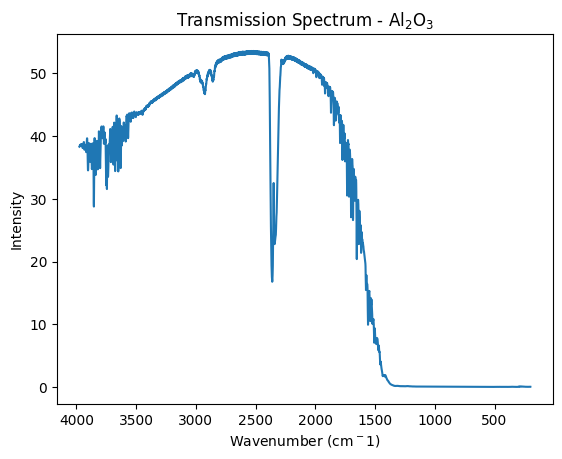

In [ ]:
#Load the transmissivity data for sapphire
sapphire_twavenumber, sapphire_tintensity = utils.load_data(r'Data/Transmittance/AlO2 transmittance.ASC')

#quick plot to check the data
plt.plot(sapphire_twavenumber, sapphire_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - Al$_2$O$_3$')
plt.gca().invert_xaxis()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

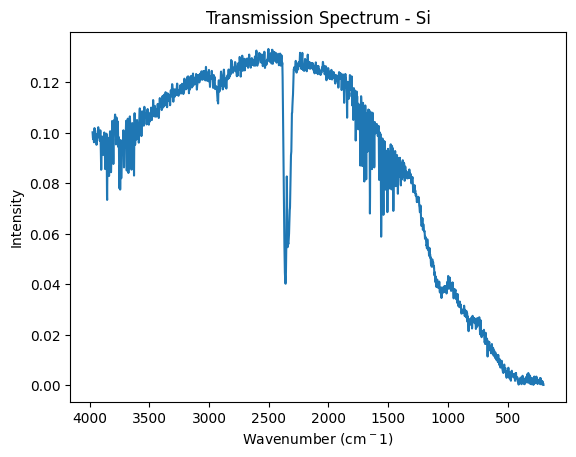

In [ ]:
#load the transmissivity data for Si
si_twavenumber, si_tintensity = utils.load_data(r'Data/Transmittance/Si transmission try 2.ASC')

#quick plot to check the data
plt.plot(si_twavenumber, si_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - Si')
plt.gca().invert_xaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

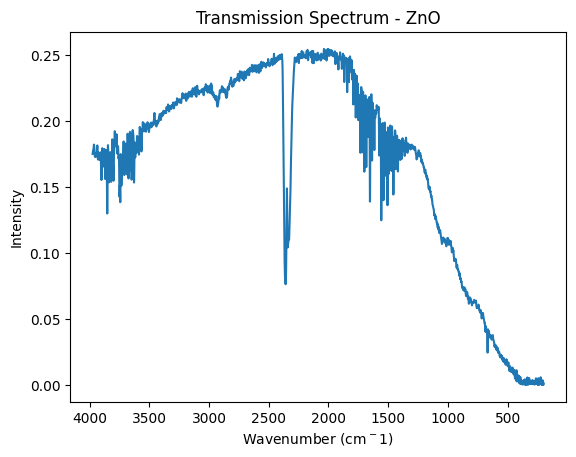

In [ ]:
#load the transmissivity data for ZnO
zno_twavenumber, zno_tintensity = utils.load_data(r'Data/Transmittance/ZnO front try 1.ASC')

#quick plot to check the data
plt.plot(zno_twavenumber, zno_tintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Transmission Spectrum - ZnO')
plt.gca().invert_xaxis()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

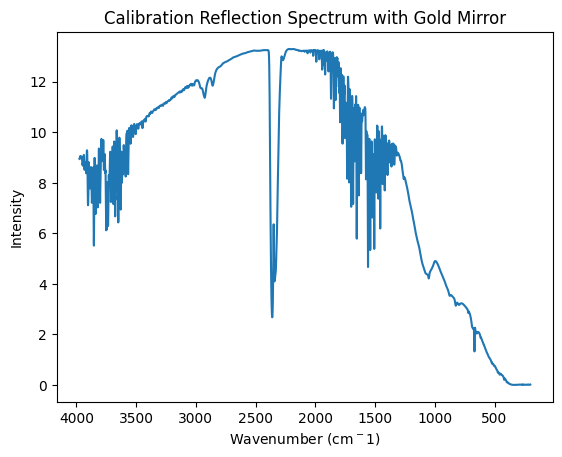

In [ ]:
#Load the baseline reflectivity data
calib_rwavenumber, calib_rintensity = utils.load_data(r'Data/Reflectivity/Gold Mirror baseline reflectivity.ASC')

#plot the data to check
plt.plot(calib_rwavenumber, calib_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Calibration Reflection Spectrum with Gold Mirror')
plt.gca().invert_xaxis()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

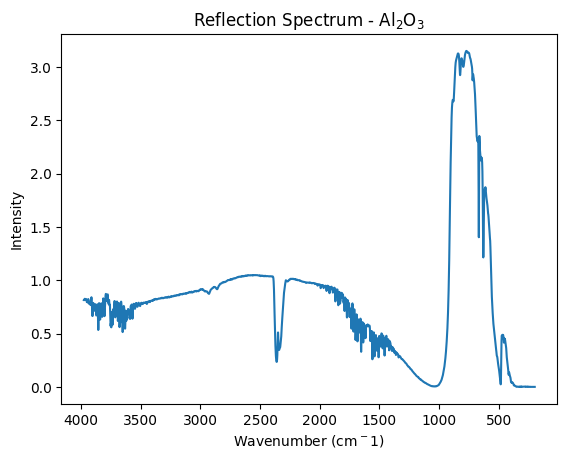

In [ ]:
#Load the reflectivity data for sapphire
sapphire_rwavenumber, sapphire_rintensity = utils.load_data(r'Data/Reflectivity/AlO2 Reflectivity full range.ASC')

#plot the data to check
plt.plot(sapphire_rwavenumber, sapphire_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - Al$_2$O$_3$')
plt.gca().invert_xaxis()

plt.show

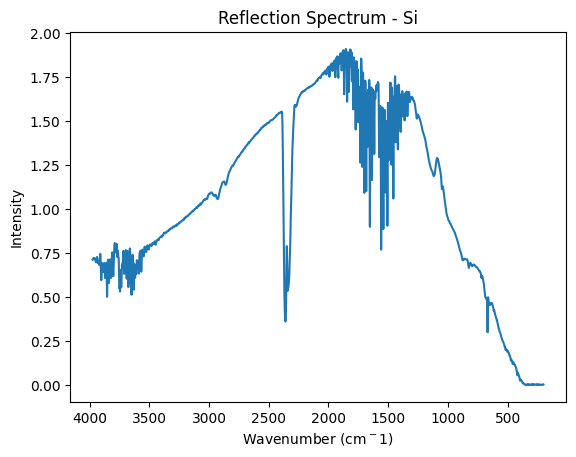

In [ ]:
#Load the reflectivity data for Si
si_rwavenumber, si_rintensity = utils.load_data(r'Data/Reflectivity/Silicone reflectivity spectrum.ASC')

#plot the data to check
plt.plot(si_rwavenumber, si_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - Si')
plt.gca().invert_xaxis()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

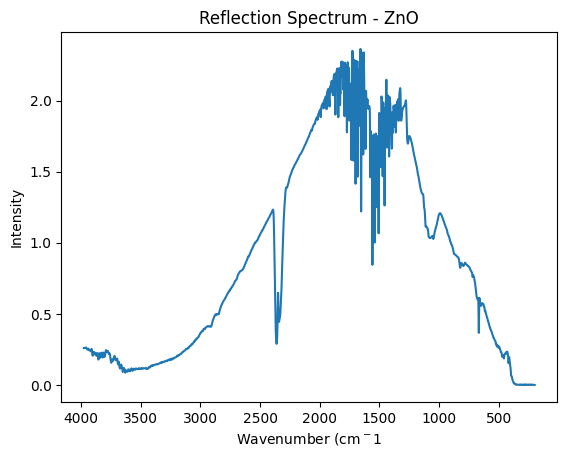

In [ ]:
#Load the reflectivity data for ZnO
zno_rwavenumber, zno_rintensity = utils.load_data(r'Data/Reflectivity/ZnO thin film reflectivity.ASC')

#plot the data to check
plt.plot(zno_rwavenumber, zno_rintensity)
plt.xlabel('Wavenumber (cm$^-1$')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - ZnO')
plt.gca().invert_xaxis()

plt.show

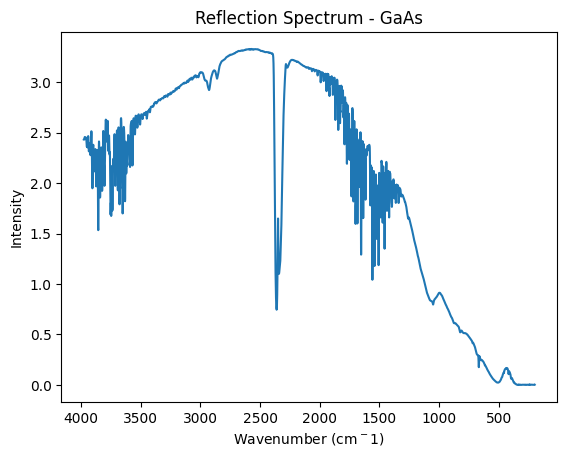

In [ ]:
#Load the reflectivity data for GaAs
gaas_rwavenumber, gaas_rintensity = utils.load_data(r'Data/Reflectivity/GaAs reflectivity spectrum.ASC')

#plot to check data
plt.plot(gaas_rwavenumber, gaas_rintensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Reflection Spectrum - GaAs')
plt.gca().invert_xaxis()

plt.show()

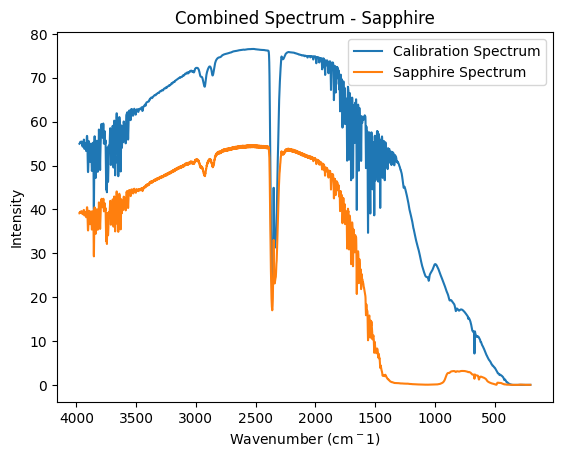

In [54]:
#Combine reflectivity and transmissivity of sapphire and plot
sapphire_comb_intensity = sapphire_tintensity + sapphire_rintensity
vapor_comb_intensity = vapor_plate_intensity + calib_rintensity

#plot the new data
plt.plot(sapphire_twavenumber, vapor_comb_intensity, label = 'Calibration Spectrum')
plt.plot(sapphire_twavenumber, sapphire_comb_intensity, label = 'Sapphire Spectrum')
plt.legend()
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Combined Spectrum - Sapphire')
plt.gca().invert_xaxis()

plt.legend()

plt.show()

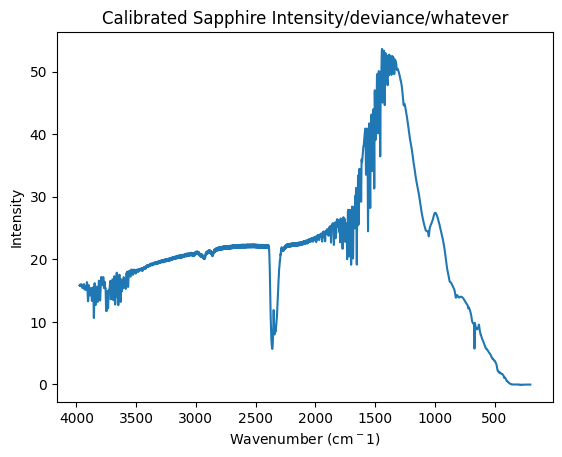

In [55]:
#subtracting the sapphire from the calibration data
calibrated_sapphire_intensity = vapor_comb_intensity - sapphire_comb_intensity

#plotty-boii
plt.plot(sapphire_twavenumber, calibrated_sapphire_intensity)
plt.xlabel('Wavenumber (cm$^-1$)')
plt.ylabel('Intensity')
plt.title('Calibrated Sapphire Intensity/deviance/whatever')
plt.gca().invert_xaxis()

plt.show()


